## Problem Statement
**Fashion-MNIST is a dataset of Zalando's article images, divided into ten classes**

**Each training and test example is assigned to one of the following labels:**

- Label &emsp;Description
- 0	 &emsp;&emsp;&emsp;T-shirt/top
- 1	 &emsp;&emsp;&emsp;Trouser
- 2	 &emsp;&emsp;&emsp;Pullover
- 3	 &emsp;&emsp;&emsp;Dress
- 4	 &emsp;&emsp;&emsp;Coat
- 5	 &emsp;&emsp;&emsp;Sandal
- 6	 &emsp;&emsp;&emsp;Shirt
- 7	 &emsp;&emsp;&emsp;Sneaker
- 8	 &emsp;&emsp;&emsp;Bag
- 9	 &emsp;&emsp;&emsp;Ankle boot


- The training dataset consists of 60,000 examples.
- The test dataset consists of 10,000 examples.
- Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

In [223]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [224]:
# read the dataset:
from keras.datasets import fashion_mnist

In [225]:
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

In [4]:
# visualising the shape of the data

In [226]:
# creating a dictionary of the image names for easy referencing
image_names = dict(zip(np.arange(0,10), ['T-shirt/top',	'Trouser',	'Pullover',	'Dress',	'Coat',	'Sandal',	'Shirt',	'Sneaker',	'Bag',	'Ankle boot']))
image_names

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [6]:
# checking the dimensions of the training data
print("The dimensions for the training images are : {}".format(x_train.shape))
print("The dimensions for the training labels are : {}".format(y_train.shape))

The dimensions for the training images are : (60000, 28, 28)
The dimensions for the training labels are : (60000,)


In [7]:
# checking the dimensions of the test data
print("The dimensions for the test images are : {}".format(x_test.shape))
print("The dimensions for the test labels are : {}".format(y_test.shape))

The dimensions for the test images are : (10000, 28, 28)
The dimensions for the test labels are : (10000,)


## Visualising the dataset:

Shirt


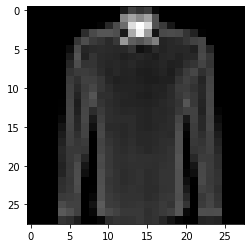

In [8]:
# picking a random index to see the image and its corresponding label
n_training = len(x_train)
i = np.random.randint(1,n_training)

# setting the cmap to gray as the images are in grayscale
plt.imshow(x_train[i], cmap = 'gray')
print(image_names.get(y_train[i]))

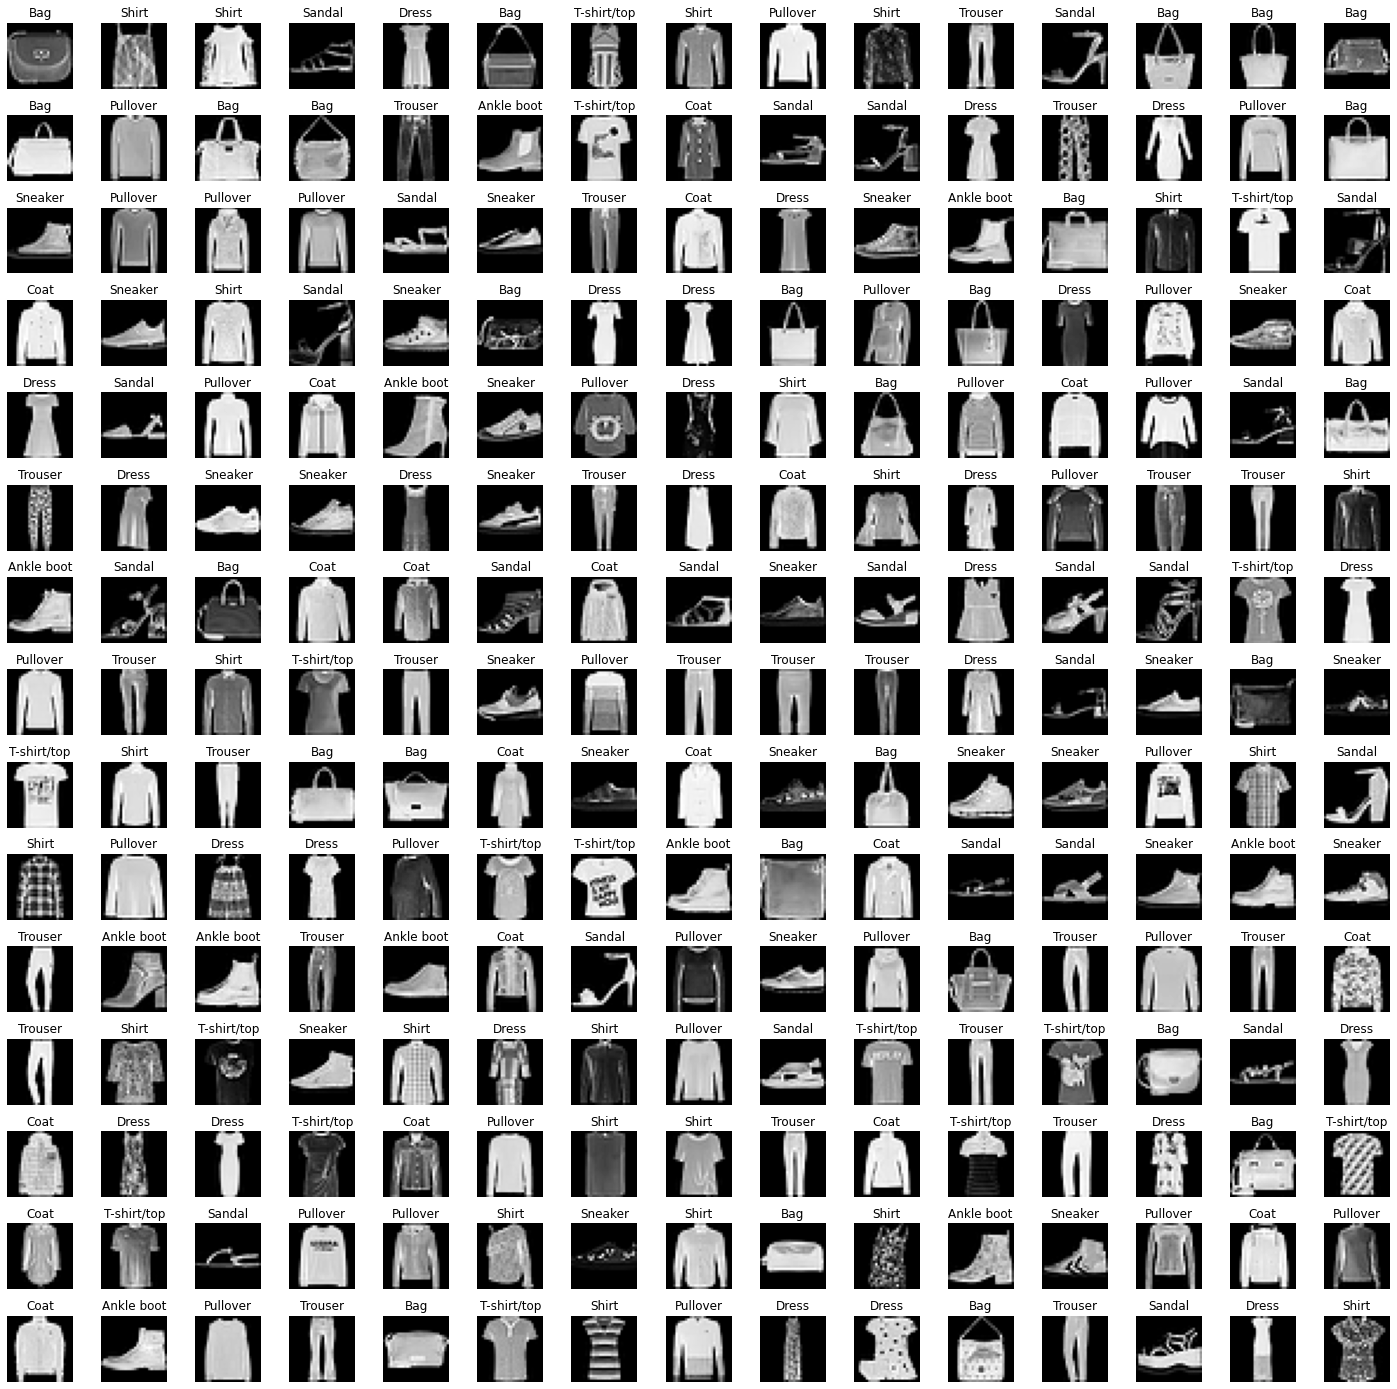

In [9]:
# creating a grid of training images
length_grid = 15
width_grid = 15
fig, axes = plt.subplots(width_grid, length_grid, figsize = (25,25))
axes = axes.ravel()

for i in np.arange(0, length_grid * width_grid):
    index = np.random.randint(1,n_training)
    axes[i].imshow(x_train[index], cmap = 'gray')
    
    #     setting the title for each image
    axes[i].set_title(image_names.get(y_train[index]))
    
    #     switching off the axes for each images to show it more clearly
    axes[i].axis('off')
    
# adding some space between the images to make the visualization clearer
plt.subplots_adjust(hspace= 0.4)    

## Data Preparation

In [227]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')

In [228]:
number_cat = 10

In [12]:
# y_train has decimal values, which need to be converting to binary type for further operations

In [229]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [271]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [231]:
# now need to normalize the feature dataset

X_train = np.asarray(X_train)/255
X_test = np.asarray(X_test)/255

In [18]:
X_test[9]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [232]:
# retrieving the shape of each image in X_train
input_shape = (X_train.shape[1:][0], X_train.shape[1:][1],1)
# input_shape.reshape(-1, 28,28,1)

X_train= X_train.reshape(-1,28,28,1)
X_test= X_test.reshape(-1,28,28,1)

input_shape= X_train.shape[1:]

## Training the model

In [233]:
# importing the required libraries
# import Sequential to build the model in a sequential fashion, from left to right
from keras.models import Sequential

# import different layers to perform different processes:
# 1. Conv2D will perform the convolution process
# 2. MaxPooling2D will perform downsampling/subsampling to reduce the dimensionality of the image
# 3. AveragePooling2D is another method of dimensioanlity reduction
# 4. Dense will create the fully connected ANN
# 5. Flatten will convert the array from 2D to 1D so that it can be fed to produce the final output
# 6. Dropout is used to drop some neurons from the model to prevent overfitting and create a good model

from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout

# Adam optimizer is frequently used to update the weights of the network
from keras.optimizers import Adam

# Tensorflow is used as the backend to Keras API
from keras.callbacks import TensorBoard

In [234]:
# Creating an empty model and adding layers subsequently
cnn_model = Sequential()

# Adding the first Convolution layer. Adding 32 filters, each of kernel_size (3,3)
# Adding the Activation function as relu so that the values below 0 are treated as 0, and those above 0 are retained as such
cnn_model.add(Conv2D(filters = 32,  kernel_size = (3,3),  input_shape = input_shape, activation = 'relu'))

# Adding the second Convolution layer, with the same specifications. 
# No need to add the input_shape this time as this layer will inherit the output of the previous layer
cnn_model.add(Conv2D(filters = 32, kernel_size  = (3,3), activation = 'relu'))

# Adding the MaxSpooling layer
cnn_model.add(MaxPooling2D((2,2)))

# Adding the first Dropout layer. Dropping out 30% of the neurons with their weights
# cnn_model.add(Dropout(0.3))

# Adding a second layer of convolutions and MaxPooling alongwith a Dropout of 20% to create some depth in the network

# Adding two more Convolutions layers, this time with 64 filters
cnn_model.add(Conv2D(filters = 64,  kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size  = (3,3), activation = 'relu'))

# Adding the MaxSpooling layer
cnn_model.add(MaxPooling2D((2,2)))

# Adding the Dropout layer. Dropping out 20% of the neurons with their weights
cnn_model.add(Dropout(0.2))


# Perform flattening
cnn_model.add(Flatten())

# Need to add a Dense layer so as to create a fully connected neural network
cnn_model.add(Dense(units = 512, activation = 'relu'))

# Creating another hidden layer with the same specifications
cnn_model.add(Dense(units = 1024, activation = 'relu'))

# Building the output layer
# As the output classes have 10 values, so need to add 10 units
# Using the softmax activation fucntion in order to classify the output into one of the 10 classes
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [235]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=5)

In [236]:
# Now need to compile the neural network

cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [237]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 50, shuffle = True, callbacks = [early_stop])

Epoch 1/50
1875/1875 [==============================] - 91s 48ms/step - loss: 0.6270 - accuracy: 0.7659
Epoch 2/50
1875/1875 [==============================] - 91s 49ms/step - loss: 0.3344 - accuracy: 0.8847
Epoch 3/50
1875/1875 [==============================] - 90s 48ms/step - loss: 0.3232 - accuracy: 0.8899
Epoch 4/50
1875/1875 [==============================] - 96s 51ms/step - loss: 0.3289 - accuracy: 0.8881
Epoch 5/50
1875/1875 [==============================] - 98s 52ms/step - loss: 0.3341 - accuracy: 0.8894
Epoch 6/50
1875/1875 [==============================] - 100s 53ms/step - loss: 0.3524 - accuracy: 0.8861
Epoch 7/50
1875/1875 [==============================] - 99s 53ms/step - loss: 0.3555 - accuracy: 0.8832
Epoch 8/50
1875/1875 [==============================] - 98s 52ms/step - loss: 0.3842 - accuracy: 0.8826
Epoch 00008: early stopping


## Model Evaluation

In [238]:
evaluation = cnn_model.evaluate(X_test, y_test)
print("Test Accuracy: {}".format(evaluation[1]))

313/313 [==============================] - 2s 7ms/step - loss: 0.3799 - accuracy: 0.8835
Test Accuracy: 0.8834999799728394


In [239]:
y_pred = cnn_model.predict_classes(X_test)
y_pred

C:\Users\shamb\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [240]:
# converting the y_test values from binary to decimal
y_test = y_test.argmax(1)

In [241]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

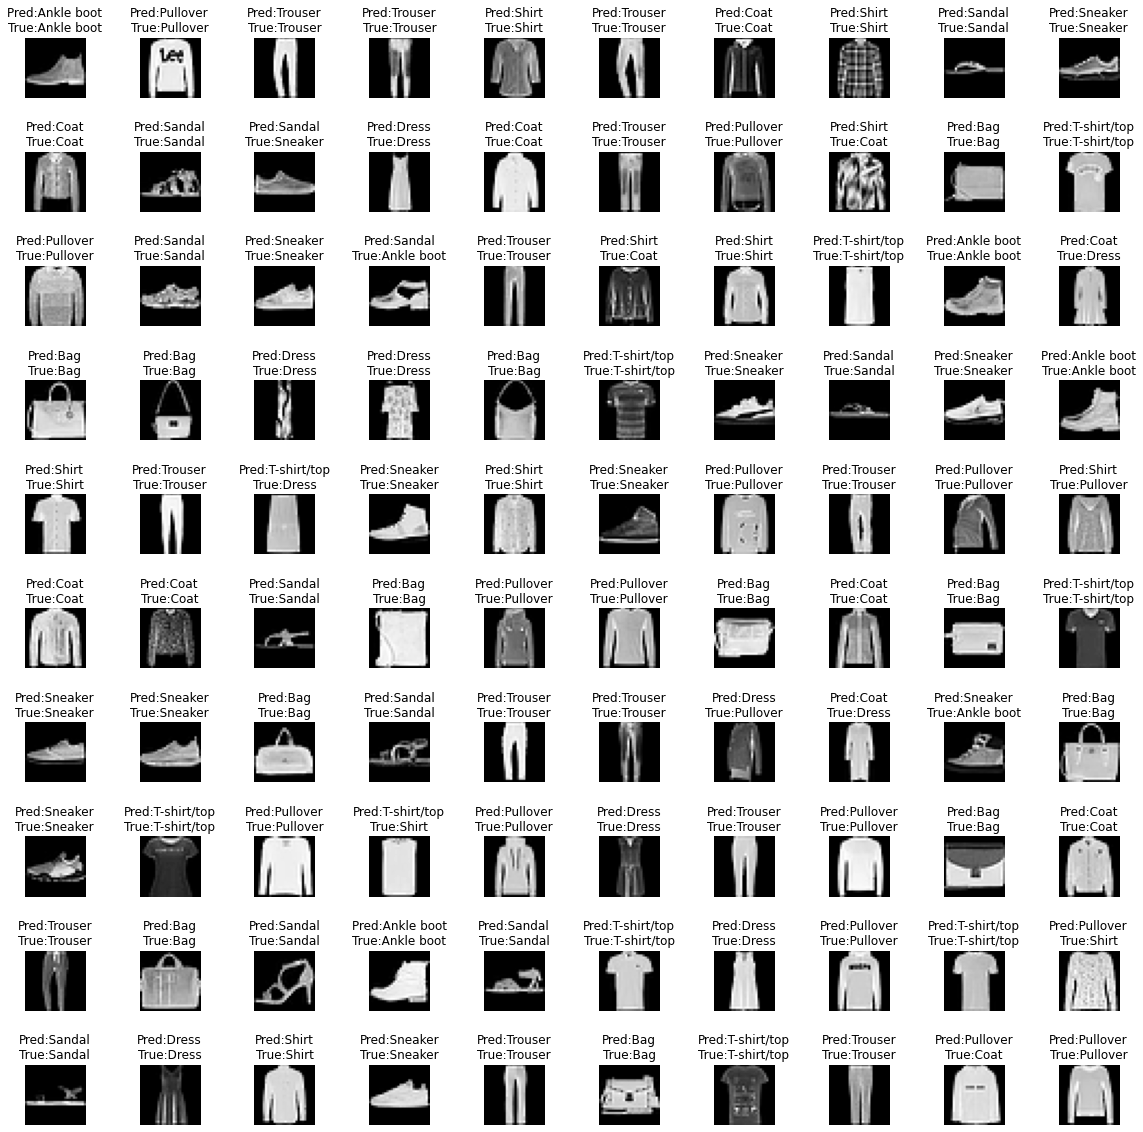

In [242]:
#  Visualizing the results in order to see how well the model performed in predicting the target classes

length = 10
width = 10
fig,axes = plt.subplots(length, width, figsize = (20,20))
axes = axes.ravel()

for i in np.arange(0, length * width):
    axes[i].imshow(X_test[i], cmap = 'gray')
    axes[i].set_title("Pred:{}\nTrue:{}".format(image_names.get(y_pred[i]), image_names.get(y_test[i])))
    
    #     switching off the axes for each images to show it more clearly
    axes[i].axis('off')
    

# adding some space between the images to make the visualization clearer
plt.subplots_adjust(hspace= 0.9, wspace= 0.4)       

In [243]:
# calculating the classification metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve

<AxesSubplot:>

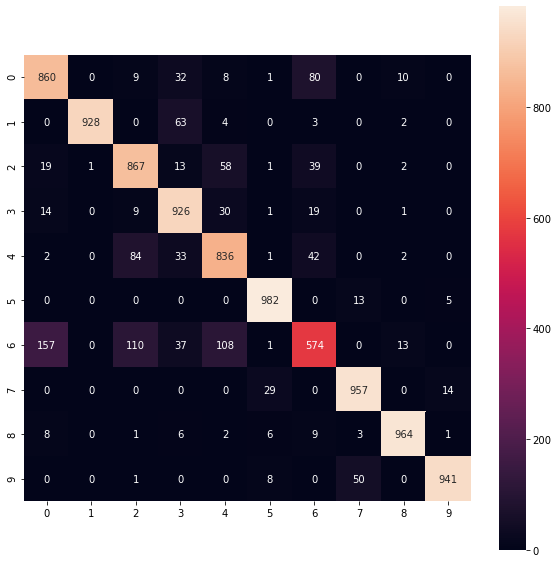

In [244]:
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), square = True, annot = True, fmt = 'd')

In [245]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       1.00      0.93      0.96      1000
           2       0.80      0.87      0.83      1000
           3       0.83      0.93      0.88      1000
           4       0.80      0.84      0.82      1000
           5       0.95      0.98      0.97      1000
           6       0.75      0.57      0.65      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Saving the model

In [246]:
import os
directory = os.path.join(os.getcwd(), 'saved models')

if(not os.path.isdir(directory)):
    os.makedirs(directory)
    
model_path = os.path.join(directory, "keras_fashion_mnist_trained_model.h5")    
cnn_model.save(model_path)

## Data Augmentation

In [63]:
# importing the dataset again

In [147]:
from keras.datasets import fashion_mnist
(x_train1, y_train1), (x_test1, y_test1)= fashion_mnist.load_data()

In [148]:
# checking the dimensions of the training data
print("The dimensions for the training images are : {}".format(x_train1.shape))
print("The dimensions for the training labels are : {}".format(y_train1.shape))

The dimensions for the training images are : (60000, 28, 28)
The dimensions for the training labels are : (60000,)


In [149]:
# checking the dimensions of the test data
print("The dimensions for the test images are : {}".format(x_test1.shape))
print("The dimensions for the test labels are : {}".format(y_test1.shape))

The dimensions for the test images are : (10000, 28, 28)
The dimensions for the test labels are : (10000,)


In [197]:
from keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(rotation_range=90)

n = 8
X_train_sample = X_train1[:8]

datagen_train.fit(X_train_sample)


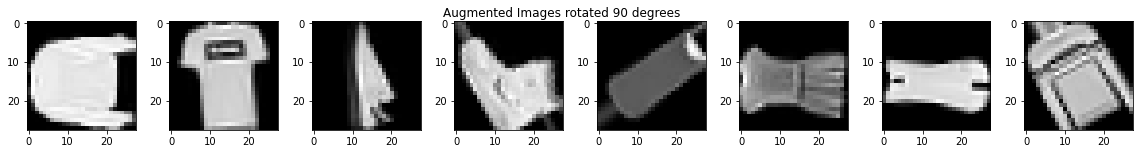

<Figure size 1440x144 with 0 Axes>

In [198]:
from PIL.Image import fromarray

fig = plt.figure(figsize = (20,2))

for X_batch in datagen_train.flow(X_train_sample, batch_size=n):
    for i in range(0,n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(fromarray(np.squeeze(X_batch[i]).astype(np.uint8)), cmap = 'gray')
        
    fig.suptitle(("Augmented Images rotated 90 degrees"))
    plt.show()
    break

In [206]:
datagen_train2 = ImageDataGenerator(horizontal_flip= True)

n = 8
X_train_sample = X_train1[:8]

datagen_train2.fit(X_train_sample)

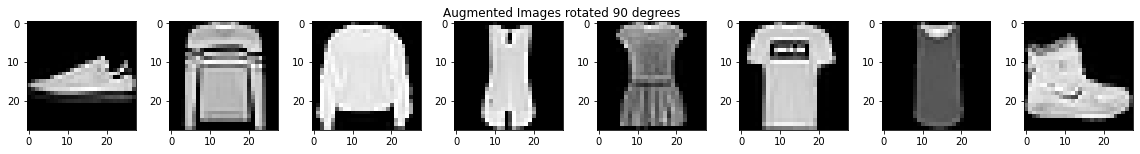

In [208]:
fig = plt.figure(figsize = (20,2))

for X_batch in datagen_train2.flow(X_train_sample, batch_size=n):
    for i in range(0,n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(fromarray(np.squeeze(X_batch[i]).astype(np.uint8)), cmap = 'gray')
        
    fig.suptitle(("Augmented Images Flipped Horizontally"))
    plt.show()
    break
    

In [209]:
datagen_train3 = ImageDataGenerator(shear_range=5)

n = 8
X_train_sample = X_train1[:8]

datagen_train3.fit(X_train_sample)

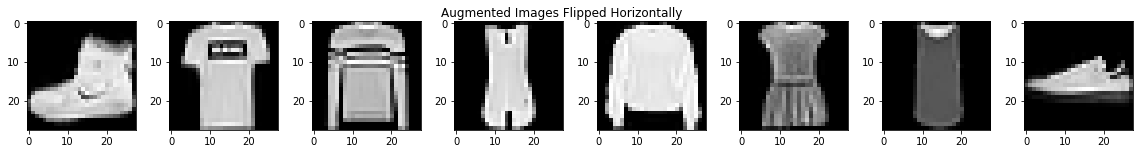

In [210]:
fig = plt.figure(figsize = (20,2))

for X_batch in datagen_train3.flow(X_train_sample, batch_size=n):
    for i in range(0,n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(fromarray(np.squeeze(X_batch[i]).astype(np.uint8)), cmap = 'gray')
        
    fig.suptitle(("Augmented Images Sheared by a factor of 5"))
    plt.show()
    break
    

In [214]:
datagen_train4 = ImageDataGenerator(brightness_range=(1,3))

n = 8
X_train_sample = X_train1[:8]

datagen_train4.fit(X_train_sample)

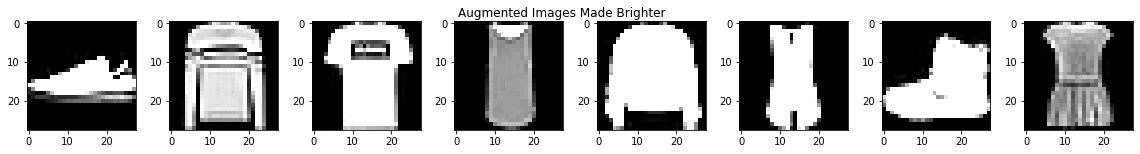

In [216]:
fig = plt.figure(figsize = (20,2))

for X_batch in datagen_train4.flow(X_train_sample, batch_size=n):
    for i in range(0,n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(fromarray(np.squeeze(X_batch[i]).astype(np.uint8)), cmap = 'gray')
        
    fig.suptitle(("Augmented Images Made Brighter"))
    plt.show()
    break
    

## Model Training using Augmented Dataset

In [247]:
datagen = ImageDataGenerator(
            rotation_range= 90,
            width_shift_range=0.1,
            horizontal_flip= True,
            brightness_range=(1,3)
        )

In [248]:
datagen.fit(X_train)

In [250]:
cnn_model.fit_generator(datagen.flow(X_train, y_train,  batch_size = 32), epochs = 25, callbacks = [early_stop])

Epoch 1/25
1875/1875 [==============================] - 98s 52ms/step - loss: 1.0438 - accuracy: 0.6359
Epoch 2/25
1875/1875 [==============================] - 93s 50ms/step - loss: 1.0227 - accuracy: 0.6355
Epoch 3/25
1875/1875 [==============================] - 101s 54ms/step - loss: 1.0540 - accuracy: 0.6367
Epoch 4/25
1875/1875 [==============================] - 96s 51ms/step - loss: 1.0410 - accuracy: 0.6374
Epoch 5/25
1875/1875 [==============================] - 98s 52ms/step - loss: 1.0382 - accuracy: 0.6371
Epoch 6/25
1875/1875 [==============================] - 101s 54ms/step - loss: 1.0654 - accuracy: 0.6350
Epoch 7/25
1875/1875 [==============================] - 100s 53ms/step - loss: 1.1199 - accuracy: 0.6352
Epoch 8/25
1875/1875 [==============================] - 98s 52ms/step - loss: 1.0838 - accuracy: 0.6345
Epoch 9/25
1875/1875 [==============================] - 100s 53ms/step - loss: 1.0194 - accuracy: 0.6381
Epoch 10/25
1875/1875 [==============================] - 94s

In [277]:
scores = cnn_model.evaluate(X_test, y_test)
print("Accuracy : {}".format(scores[1]))

313/313 [==============================] - 2s 7ms/step - loss: 41.7614 - accuracy: 0.1917
Accuracy : 0.19169999659061432


In [278]:
y_pred = cnn_model.predict_classes(X_test)

C:\Users\shamb\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [282]:
y_test = y_test.argmax(1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [283]:
y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

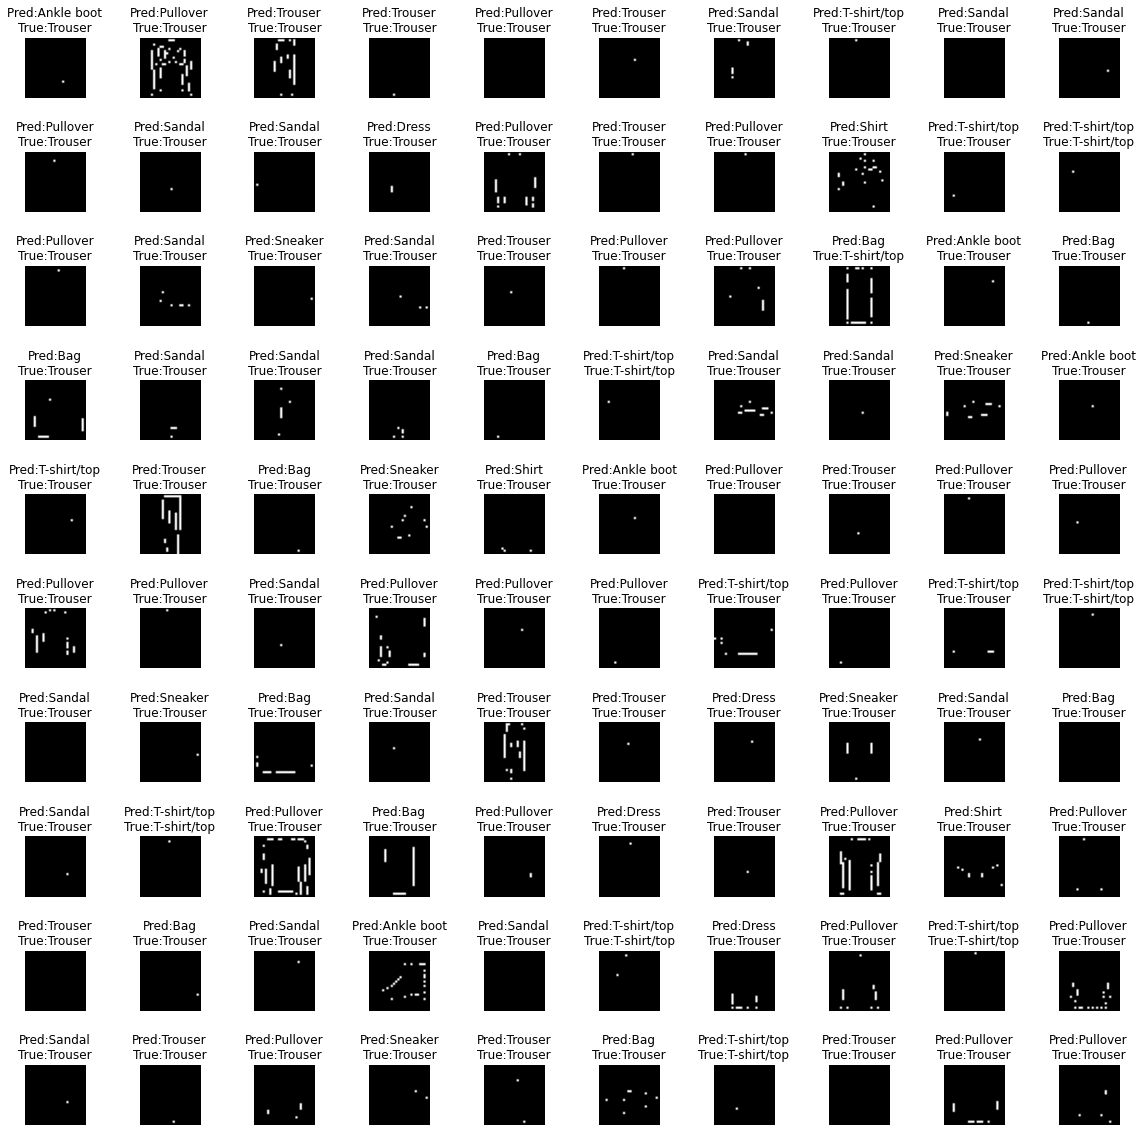

In [285]:
#  Visualizing the results in order to see how well the model performed in predicting the target classes

length = 10
width = 10
fig,axes = plt.subplots(length, width, figsize = (20,20))
axes = axes.ravel()

for i in np.arange(0, length * width):
#     axes[i].imshow(X_test[i], cmap = 'gray')
    axes[i].imshow(fromarray(np.squeeze(X_test[i]).astype(np.uint8)), cmap = 'gray')
    axes[i].set_title("Pred:{}\nTrue:{}".format(image_names.get(y_pred[i]), image_names.get(y_test[i])))
    
    #     switching off the axes for each images to show it more clearly
    axes[i].axis('off')
    

# adding some space between the images to make the visualization clearer
plt.subplots_adjust(hspace= 0.9, wspace= 0.4)     

<AxesSubplot:>

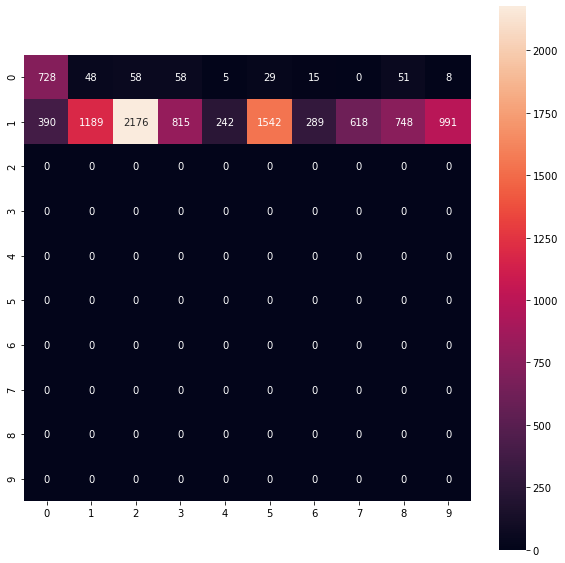

In [287]:
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), square = True, annot = True, fmt = 'd')

In [288]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69      1000
           1       0.96      0.13      0.23      9000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.19     10000
   macro avg       0.16      0.09      0.09     10000
weighted avg       0.93      0.19      0.28     10000



C:\Users\shamb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shamb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shamb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Saving the model

In [286]:
import os
directory = os.path.join(os.getcwd(), 'saved models')

if(not os.path.isdir(directory)):
    os.makedirs(directory)
    
model_path = os.path.join(directory, "keras_fashion_mnist_augmented_model.h5")    
cnn_model.save(model_path)